# データの読み込み（pygrib）
参考文献  
[Jupyter nbviewer - Matplotlib/Basemap and pygrib example](https://nbviewer.jupyter.org/gist/jswhit/8635665)  
[Qiita - grib2をpython(matplotlib)で地図上で可視化](https://qiita.com/mhangyo/items/f06debce3975a269a658)  
[Qiita - 気象データをもとに「天気図っぽい前線」を機械学習で描いてみる(2)](https://qiita.com/m-taque/items/988b08185097dca5f5b5)

In [1]:
import pygrib
import numpy as np

In [2]:
grbs = pygrib.open('anl_p125_hgt.195801')
#grbs = pygrib.open('anl_surf125.195801')

In [3]:
#grb = grbs.select()[1]
#grb.keys()  # 選択可能な属性の確認

In [42]:
#grbs.rewind()  # イテレータのリセット

In [43]:
vals, levs = [], []

for grb in grbs:
    #print(grb)  # wgribと同じ出力（多分）
    #print(grb.parameterName, '|', grb.level)
    vals.append(grb.values)  # データの読み込み
    levs.append(grb.level)  # 気圧面情報の読み込み
    lats_m, lons_m = grb.latlons()  # np.meshgridと同じ状態の二次元配列

In [15]:
vals = np.array(vals)
vals.shape

(37, 145, 288)

# データの整理（XarrayによるnetCDF的な利用）
参考文献  
[Wikipedia - NetCDF](https://ja.wikipedia.org/wiki/NetCDF)  
[Qiita - xarrayを用いたデータ解析](https://qiita.com/fujiisoup/items/0d71995e54055e9708fc)  
[xarray User Guide - Data Structures](https://xarray.pydata.org/en/stable/user-guide/data-structures.html)  
[xarray User Guide - Reading and writing files](http://xarray.pydata.org/en/stable/user-guide/io.html#)  
[stack overflow - How to undo or reverse np.meshgrid?](https://stackoverflow.com/questions/53385605/how-to-undo-or-reverse-np-meshgrid)  

In [123]:
import xarray as xr

In [48]:
lats = lats_m[:, 0]  # meshgridを解体して
lons = lons_m[0, :]  # 一次元の数列にする
print(len(lats))
print(len(lons))
print(len(levs))

145
288
37


In [134]:
da = xr.Dataset(
    {'GeopotentialHeight': (('lev', 'lat', 'lon'), np.array(vals, dtype='f4'))},
    coords={
        'lev': levs,
        'lat': np.array(lats, dtype='f4'),
        'lon': np.array(lons, dtype='f4'),
    },
    attrs={
        'units': 'gpm',
        'dataset': 'JRA-55'
    }
)

In [125]:
ds.to_netcdf('test.nc')

# 簡易的な作図（Cartopy）
参考文献  
[scitools cartopy - Using cartopy with matplotlib](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html)  
[Qiita - xarrayを用いたデータ解析](https://qiita.com/fujiisoup/items/0d71995e54055e9708fc)  

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

AttributeError: 'Dataset' object has no attribute 'data'

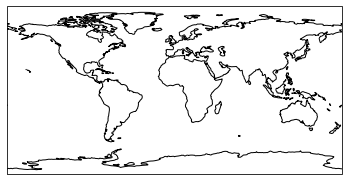

In [132]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

#z = ds['GeopotentialHeight'].sel(lev=500)
z = ds.data.sel(lev=500)

c = ax.contourf(z.lon, z.lat, z)
plt.colorbar(c)

plt.show

In [127]:
#z500 = ds.sel(lev=500).plot.contourf(
#        subplot_kws=dict(projection=ccrs.PlateCarree()))
# 出来ませんでした．．
# https://xarray.pydata.org/en/stable/user-guide/plotting.html#maps

AttributeError: '_Dataset_PlotMethods' object has no attribute 'contourf'

### その他
MetPyとXarrayのリンク
[MetPy User Guide - xarray with MetPy Tutorial](https://unidata.github.io/MetPy/latest/tutorials/xarray_tutorial.html)  
[MetPy Reference Guide - xarray](https://unidata.github.io/MetPy/latest/api/generated/metpy.xarray.html)